# The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [1]:
import os
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
import matplotlib.pyplot as plt

# Define a function to load the pickle file from IBM COS
def load_pickle_from_cos(bucket, key, client):
    # Get the object from the bucket
    response = client.get_object(Bucket=bucket, Key=key)
    
    # Read the object content
    object_content = response['Body'].read()
    
    # Load the pickle file into a DataFrame
    df = pd.read_pickle(io.BytesIO(object_content))
    return df

# Define a function to upload a file to IBM COS
def upload_file_to_cos(bucket, key, file_path, client):
    with open(file_path, 'rb') as data:
        client.upload_fileobj(data, bucket, key)

# Initialize the COS client
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MjJB2foti-ACb0aum6tpr_MABhlskLbgK4djDXeXLltL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'task410-donotdelete-pr-fck0m7flgp8x29'
object_key = 'task4.9_part1.pkl'

# Load the DataFrame
df = load_pickle_from_cos(bucket, object_key, cos_client)

# Display the first few rows of the DataFrame
print(df.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered eval_set  \
0                     NaN         196                  1          0    prior   
1                    15.0         196                  1          1    prior   
2                    21.0         196                  1          1    prior   
3                    29.0         196                  1          1    prior   
4                    28.0         196                  1          1    prior   

   ...   order_frequency_flag  first_name  surname  gender    state   age  \
0  ...  Non-frequent customer    

In [2]:
# Display the columns and their data types
print(df.dtypes)

order_id                                  int32
user_id                                   int32
order_number                              int16
order_dow                                  int8
order_hour_of_day                          int8
days_since_prior_order                  float32
product_id                                int32
add_to_cart_order                         int16
reordered                                  int8
eval_set                                 object
product_name                             object
aisle_id                                  int64
department_id                             int64
prices                                  float64
max_order                                 int16
loyalty_flag                             object
avg_price                               float64
spending_flag                            object
median_days_since_prior_order           float32
order_frequency_flag                     object
first_name                             c

In [3]:
# Alternatively, you can use the info() method for a more comprehensive summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32433030 entries, 0 to 32433029
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int32         
 1   user_id                        int32         
 2   order_number                   int16         
 3   order_dow                      int8          
 4   order_hour_of_day              int8          
 5   days_since_prior_order         float32       
 6   product_id                     int32         
 7   add_to_cart_order              int16         
 8   reordered                      int8          
 9   eval_set                       object        
 10  product_name                   object        
 11  aisle_id                       int64         
 12  department_id                  int64         
 13  prices                         float64       
 14  max_order                      int16         
 15  loyalty_flag 

In [4]:
import seaborn as sns

In [5]:
# Set the style for the plots
sns.set(style="whitegrid")

# Analyze the busiest days of the week
order_dow_counts = df['order_dow'].value_counts().sort_index()

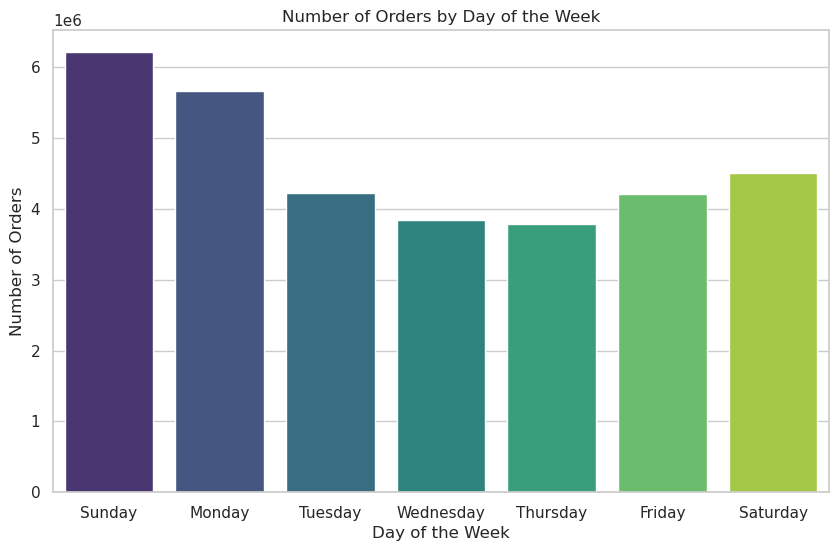

In [6]:
# Plot the busiest days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=order_dow_counts.index, y=order_dow_counts.values, palette="viridis")
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

In [7]:
# Analyze the busiest hours of the day
order_hour_counts = df['order_hour_of_day'].value_counts().sort_index()

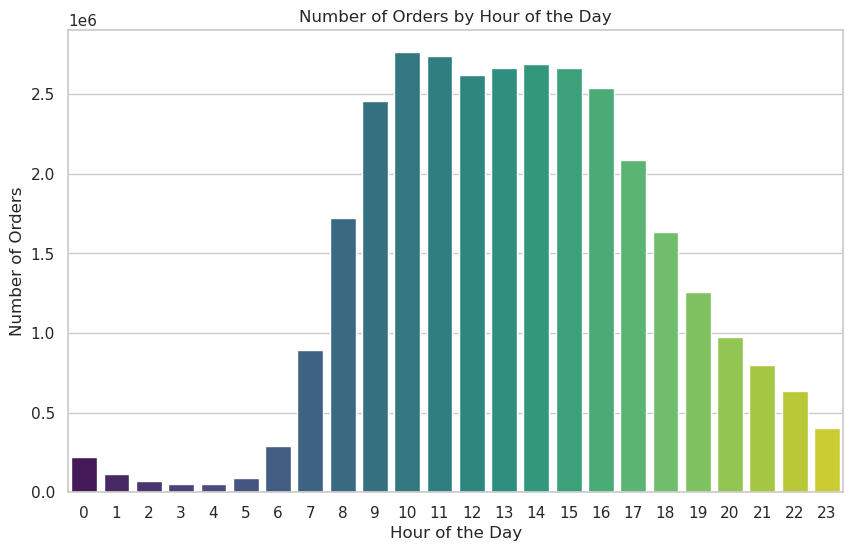

In [8]:
# Plot the busiest hours of the day
plt.figure(figsize=(10, 6))
sns.barplot(x=order_hour_counts.index, y=order_hour_counts.values, palette="viridis")
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

## Analysis of Order Patterns

### Busiest Days of the Week:
1. **Sunday**: This is the busiest day with the highest number of orders.
2. **Monday**: The second busiest day.
3. **Saturday**: Also has a high number of orders but slightly less than Sunday and Monday.

### Busiest Hours of the Day:
1. **10 AM to 3 PM**: These hours show the highest volume of orders, with a peak around 12 PM.
2. **8 AM to 9 AM**: There is a significant increase in the number of orders starting from 8 AM, peaking at around 9 AM.

### Recommendations:
- **Ads Scheduling**: Ads can be scheduled during the early morning hours (before 8 AM) and late evening hours (after 6 PM) when there are fewer orders.
- **Promotional Activities**: Consider focusing promotional activities on days with fewer orders such as Tuesday, Wednesday, and Thursday to boost sales on those days.
- **Resource Allocation**: Ensure that adequate resources are allocated during the peak hours (10 AM to 3 PM) on Sunday and Monday to handle the high volume of orders efficiently.

These insights should help the sales team in optimizing their scheduling for ads, promotional activities, and resource allocation to manage the order volumes effectively.
